# Setup for Image Processing

In [67]:
!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44

# pyplot is used for showing the output images
import matplotlib.pyplot as plt
# cv2 is used for image processing
import cv2
# numpy is used for array calculations
import numpy as np

# 1. Invariance of SIFT Features

## 1.1 Invriance Under Changes in Scale

### Compute SIFT keypoints for the reference image

(Text(0.5, 1.0, 'SIFT Features'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

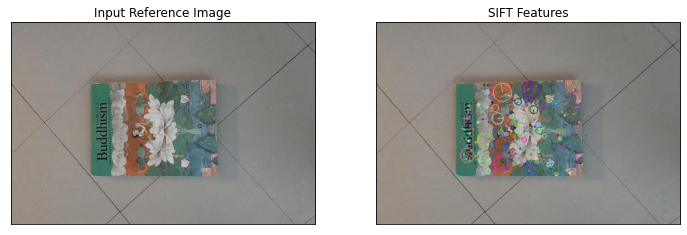

In [68]:
# load the image
book = cv2.imread('book.jpg')

# copy the image
book_SIFT = book.copy()

# covert to RGB
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
book_SIFT = cv2.cvtColor(book_SIFT, cv2.COLOR_BGR2RGB)

# create a SIFT object
book_sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, no masks
book_sift_keypoints, book_sift_descriptors = book_sift.detectAndCompute(book, None)

# draw the keypoints
cv2.drawKeypoints(book, book_sift_keypoints, book_SIFT, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display the results
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book)
plt.title("Input Reference Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_SIFT)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])

### Scale reference image using scale factors of (0.2, 0.5, 0.8, 1.25, 2, 5)

In [69]:
# get the width and the height of the reference image for scaling
book_width = book.shape[1]
book_height = book.shape[0]

# scale reference image using the scale factor 0.2
book_s02 = cv2.resize(book, (int(book_width * 0.2), int(book_height * 0.2)), cv2.INTER_AREA)

# scale reference image using the scale factor 0.5
book_s05 = cv2.resize(book, (int(book_width * 0.5), int(book_height * 0.5)), cv2.INTER_AREA)

# scale reference image using the scale factor 0.8
book_s08 = cv2.resize(book, (int(book_width * 0.8), int(book_height * 0.8)), cv2.INTER_AREA)

# scale reference image using the scale factor 1.25
book_s125 = cv2.resize(book, (int(book_width * 1.25), int(book_height * 1.25)), cv2.INTER_AREA)

# scale reference image using the scale factor 2
book_s2 = cv2.resize(book, (int(book_width * 2), int(book_height * 2)), cv2.INTER_AREA)

# scale reference image using the scale factor 5
book_s5 = cv2.resize(book, (int(book_width * 5), int(book_height * 5)), cv2.INTER_AREA)

# display the results
print(f"Size of the reference image: {book.shape[1]} x {book.shape[0]}")
print(f"Size of the scaled image with a factor of 0.2: {book_s02.shape[1]} x {book_s02.shape[0]}")
print(f"Size of the scaled image with a factor of 0.5: {book_s05.shape[1]} x {book_s05.shape[0]}")
print(f"Size of the scaled image with a factor of 0.8: {book_s08.shape[1]} x {book_s08.shape[0]}")
print(f"Size of the scaled image with a factor of 1.25: {book_s125.shape[1]} x {book_s125.shape[0]}")
print(f"Size of the scaled image with a factor of 2: {book_s2.shape[1]} x {book_s2.shape[0]}")
print(f"Size of the scaled image with a factor of 5: {book_s5.shape[1]} x {book_s5.shape[0]}")

Size of the reference image: 561 x 372
Size of the scaled image with a factor of 0.2: 112 x 74
Size of the scaled image with a factor of 0.5: 280 x 186
Size of the scaled image with a factor of 0.8: 448 x 297
Size of the scaled image with a factor of 1.25: 701 x 465
Size of the scaled image with a factor of 2: 1122 x 744
Size of the scaled image with a factor of 5: 2805 x 1860


### Compute SIFT keypoints for the transformed images

(Text(0.5, 1.0, 'SIFT Features'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

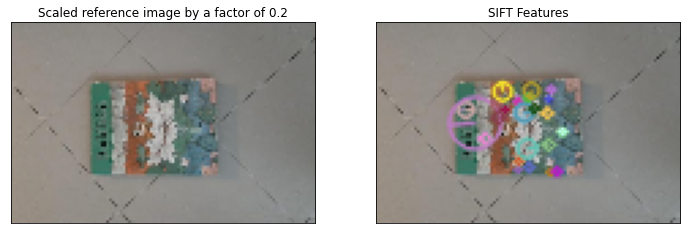

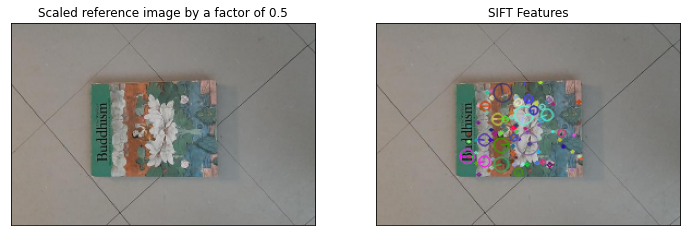

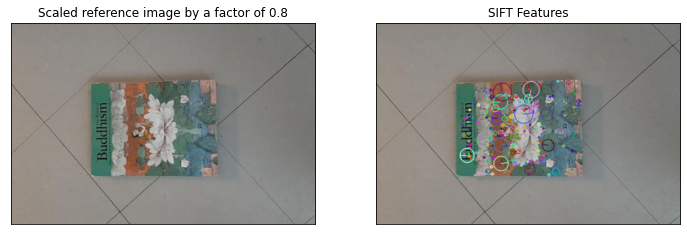

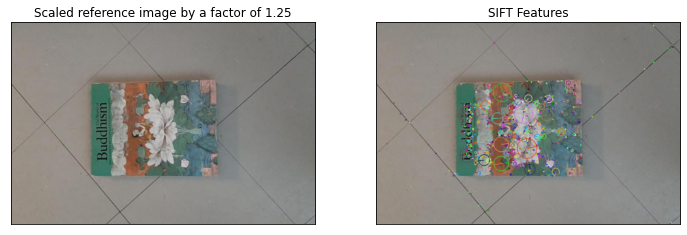

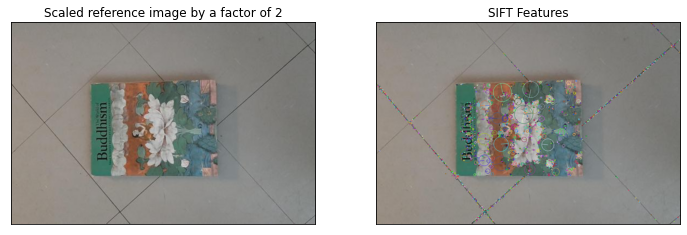

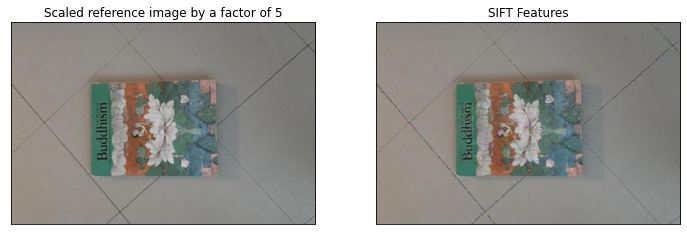

In [70]:
# create copies of the transformed images
book_s02_SIFT = book_s02.copy()
book_s05_SIFT = book_s05.copy()
book_s08_SIFT = book_s08.copy()
book_s125_SIFT = book_s125.copy()
book_s2_SIFT = book_s2.copy()
book_s5_SIFT = book_s5.copy()

# create SIFT objects for each transformed image
book_s02_sift = cv2.xfeatures2d.SIFT_create()
book_s05_sift = cv2.xfeatures2d.SIFT_create()
book_s08_sift = cv2.xfeatures2d.SIFT_create()
book_s125_sift = cv2.xfeatures2d.SIFT_create()
book_s2_sift = cv2.xfeatures2d.SIFT_create()
book_s5_sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features of each transformed image, no masks
book_s02_sift_keypoints, book_s02_sift_descriptors = book_s02_sift.detectAndCompute(book_s02, None)
book_s05_sift_keypoints, book_s05_sift_descriptors = book_s05_sift.detectAndCompute(book_s05, None)
book_s08_sift_keypoints, book_s08_sift_descriptors = book_s08_sift.detectAndCompute(book_s08, None)
book_s125_sift_keypoints, book_s125_sift_descriptors = book_s125_sift.detectAndCompute(book_s125, None)
book_s2_sift_keypoints, book_s2_sift_descriptors = book_s2_sift.detectAndCompute(book_s2, None)
book_s5_sift_keypoints, book_s5_sift_descriptors = book_s5_sift.detectAndCompute(book_s5, None)

# draw the keypoints on each of the copy of the transformed images
cv2.drawKeypoints(book_s02, book_s02_sift_keypoints, book_s02_SIFT, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_s05, book_s05_sift_keypoints, book_s05_SIFT, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_s08, book_s08_sift_keypoints, book_s08_SIFT, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_s125, book_s125_sift_keypoints, book_s125_SIFT, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_s2, book_s2_sift_keypoints, book_s2_SIFT, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_s5, book_s5_sift_keypoints, book_s5_SIFT, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display the results
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_s02)
plt.title("Scaled reference image by a factor of 0.2"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_s02_SIFT)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_s05)
plt.title("Scaled reference image by a factor of 0.5"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_s05_SIFT)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_s08)
plt.title("Scaled reference image by a factor of 0.8"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_s08_SIFT)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_s125)
plt.title("Scaled reference image by a factor of 1.25"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_s125_SIFT)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_s2)
plt.title("Scaled reference image by a factor of 2"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_s2_SIFT)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_s5)
plt.title("Scaled reference image by a factor of 5"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_s5_SIFT)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])

### Match all keypoints of the reference image to the transformed images using a brute-force method

In [71]:
# create Brute Force Matcher object (BFMatcher) for each transformed image
book_s02_bf = cv2.BFMatcher()
book_s05_bf = cv2.BFMatcher()
book_s08_bf = cv2.BFMatcher()
book_s125_bf = cv2.BFMatcher()
book_s2_bf = cv2.BFMatcher()
book_s5_bf = cv2.BFMatcher()

# match descriptors for each transformed image
book_s02_matches = book_s02_bf.match(book_sift_descriptors, book_s02_sift_descriptors)
book_s05_matches = book_s02_bf.match(book_sift_descriptors, book_s05_sift_descriptors)
book_s08_matches = book_s02_bf.match(book_sift_descriptors, book_s08_sift_descriptors)
book_s125_matches = book_s02_bf.match(book_sift_descriptors, book_s125_sift_descriptors)
book_s2_matches = book_s02_bf.match(book_sift_descriptors, book_s2_sift_descriptors)
book_s5_matches = book_s02_bf.match(book_sift_descriptors, book_s5_sift_descriptors)

### Sort matching keypoints according to the matching distance

In [72]:
# sort each transformed image's keypoint matches in the order of their distance
book_s02_matches = sorted(book_s02_matches, key = lambda x:x.distance)
book_s05_matches = sorted(book_s05_matches, key = lambda x:x.distance)
book_s08_matches = sorted(book_s08_matches, key = lambda x:x.distance)
book_s125_matches = sorted(book_s125_matches, key = lambda x:x.distance)
book_s2_matches = sorted(book_s2_matches, key = lambda x:x.distance)
book_s5_matches = sorted(book_s5_matches, key = lambda x:x.distance)

### Display top ten matched keypoints for each pair of reference image and a transformed image

(Text(0.5, 1.0, 'Matched keypoints for transformed image with a scale factor of 5'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

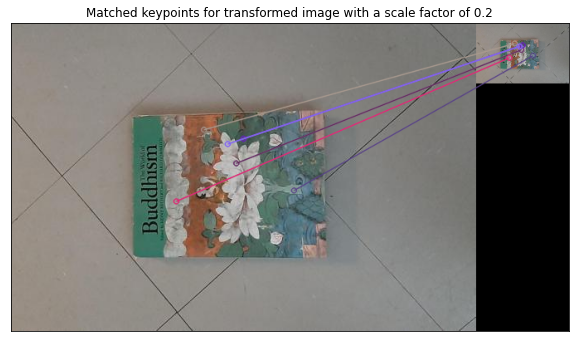

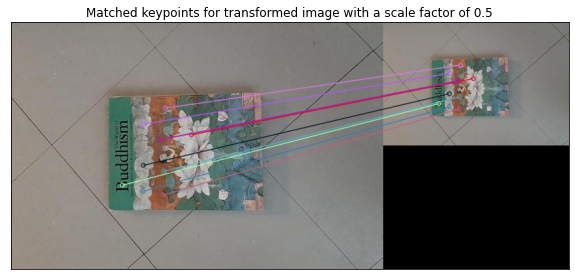

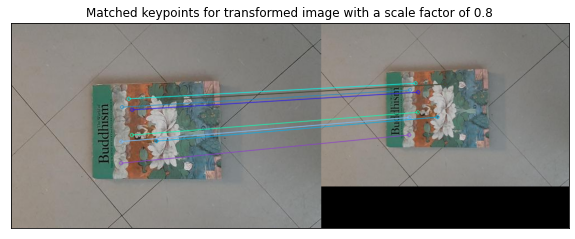

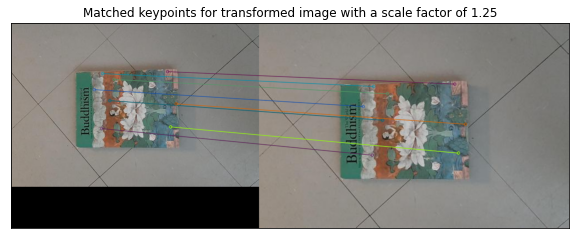

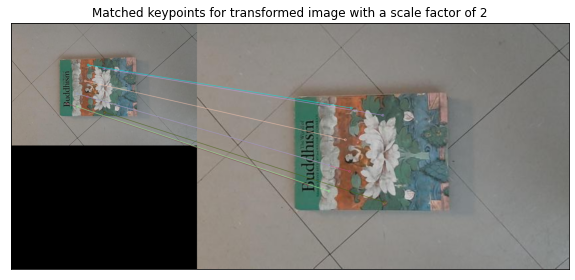

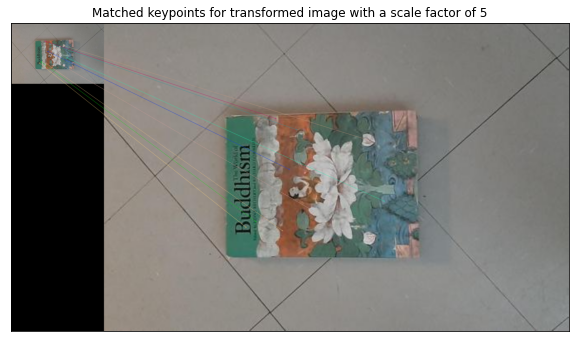

In [73]:
# draw first 10 matches
book_s02_result = cv2.drawMatches(book, book_sift_keypoints, book_s02, book_s02_sift_keypoints, book_s02_matches[:10], None, flags=2)
book_s05_result = cv2.drawMatches(book, book_sift_keypoints, book_s05, book_s05_sift_keypoints, book_s05_matches[:10], None, flags=2)
book_s08_result = cv2.drawMatches(book, book_sift_keypoints, book_s08, book_s08_sift_keypoints, book_s08_matches[:10], None, flags=2)
book_s125_result = cv2.drawMatches(book, book_sift_keypoints, book_s125, book_s125_sift_keypoints, book_s125_matches[:10], None, flags=2)
book_s2_result = cv2.drawMatches(book, book_sift_keypoints, book_s2, book_s2_sift_keypoints, book_s2_matches[:10], None, flags=2)
book_s5_result = cv2.drawMatches(book, book_sift_keypoints, book_s5, book_s5_sift_keypoints, book_s5_matches[:10], None, flags=2)

# display the results
plt.figure(figsize=(10, 10))
plt.imshow(book_s02_result)
plt.title("Matched keypoints for transformed image with a scale factor of 0.2"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10, 10))
plt.imshow(book_s05_result)
plt.title("Matched keypoints for transformed image with a scale factor of 0.5"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10, 10))
plt.imshow(book_s08_result)
plt.title("Matched keypoints for transformed image with a scale factor of 0.8"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10, 10))
plt.imshow(book_s125_result)
plt.title("Matched keypoints for transformed image with a scale factor of 1.25"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10, 10))
plt.imshow(book_s2_result)
plt.title("Matched keypoints for transformed image with a scale factor of 2"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10, 10))
plt.imshow(book_s5_result)
plt.title("Matched keypoints for transformed image with a scale factor of 5"), plt.xticks([]), plt.yticks([])

### Plot the matching distance for top 100 matched keypoints

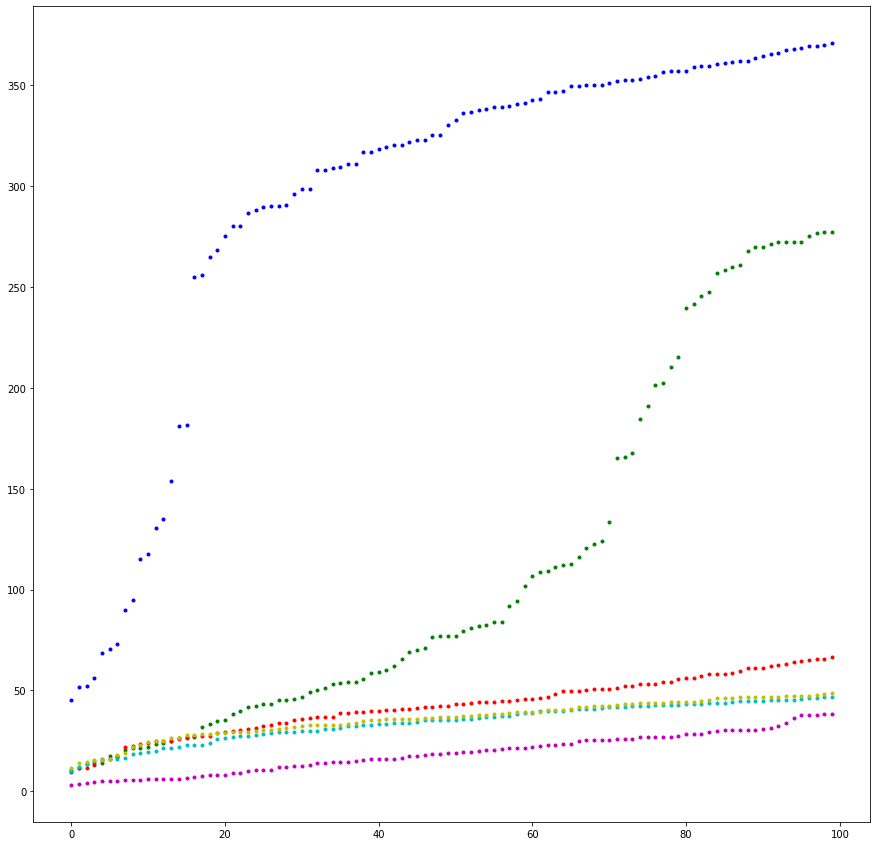

In [74]:
# plot the matching distance for top 100 matched keypoints, x-axis = descriptor index, y-axis = distance
plt.figure(figsize=(15, 15))
for i in range(100):
  plt.plot(i, book_s02_matches[i].distance, 'b.')
  plt.plot(i, book_s05_matches[i].distance, 'g.')
  plt.plot(i, book_s08_matches[i].distance, 'r.')
  plt.plot(i, book_s125_matches[i].distance, 'c.')
  plt.plot(i, book_s2_matches[i].distance, 'm.')
  plt.plot(i, book_s5_matches[i].distance, 'y.')
plt.show()

### Discuss the trend in the plotted results

Looking at the scatter plot above, where;
- blue dots are the data set of the transformed image with a scale factor of 0.2
- green dots are the data set of the transformed image with a scale factor of 0.5
- red dots are the data set of the transformed image with a scale factor of 0.8
- cyan dots are the data set of the transformed image with a scale factor of 1.25
- magenta dots are the data set of the transformed image with a scale factor of 2
- yellow dots are the data set of the transformed image with a scale factor of 5

We can see that as we increase the scale, we are getting better quality matches in terms of match distance. For example, for the transformed image with a scale factor of 0.2, the distance between the matches increase drastically roughly after the first 15 matches. This means that we will get a smaller reliable data set which we must to use to determine if two images are identical. However, if we check the data set for the transformed image with a scale factor of 2, we see that we get the closest distances for the first 100 keypoints out of all the transformed images. Therefore, this means that working with a scale factor of 2 results in better quality matches between the reference image and the transformed image. Lasty, this plot also helps to show that smaller scales, i.e. from 0.2 up to 0.8, are harder to work with and increasing the scale too much, i.e. 5, is not necessarily a helpful thing.

Also, we can see the Scale Invariance of the SIFT features in by looking at the graph above. Except the scales 0.2 and 0.5, we can see that the distances of the first 100 SIFT keypoints are almost identical.

## 1.2 Invariance Under Rotation

### Compute SIFT keypoints for the reference image (already done in 1.1, I will be using the same variables)

### Rotate reference image at the angle of (10, 30, 90, 150, 170, 180)

(Text(0.5, 1.0, 'Reference image rotated by 180 degrees'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

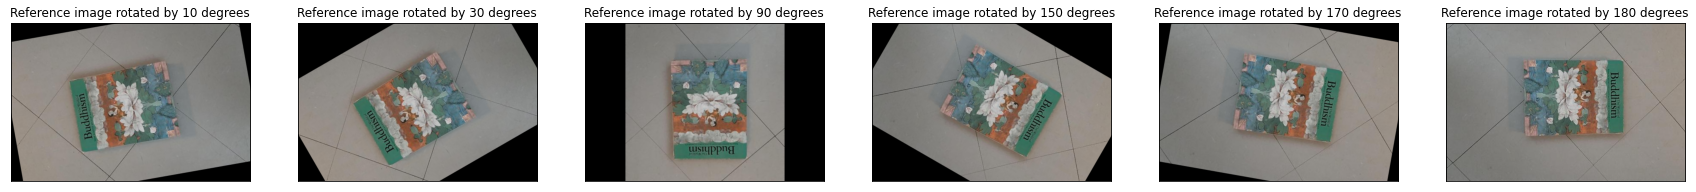

In [75]:
# rotate reference image by 10 degrees
rotation = cv2.getRotationMatrix2D((book_width/2, book_height/2), 10, 1)
book_r10 = cv2.warpAffine(book, rotation, (book_width, book_height))

# rotate reference image by 30 degrees
rotation = cv2.getRotationMatrix2D((book_width/2, book_height/2), 30, 1)
book_r30 = cv2.warpAffine(book, rotation, (book_width, book_height))

# rotate reference image by 90 degrees
rotation = cv2.getRotationMatrix2D((book_width/2, book_height/2), 90, 1)
book_r90 = cv2.warpAffine(book, rotation, (book_width, book_height))

# rotate reference image by 150 degrees
rotation = cv2.getRotationMatrix2D((book_width/2, book_height/2), 150, 1)
book_r150 = cv2.warpAffine(book, rotation, (book_width, book_height))

# rotate reference image by 170 degrees
rotation = cv2.getRotationMatrix2D((book_width/2, book_height/2), 170, 1)
book_r170 = cv2.warpAffine(book, rotation, (book_width, book_height))

# rotate reference image by 180 degrees
rotation = cv2.getRotationMatrix2D((book_width/2, book_height/2), 180, 1)
book_r180 = cv2.warpAffine(book, rotation, (book_width, book_height))

# display the results
plt.figure(figsize=(30, 30))
plt.subplot(161), plt.imshow(book_r10)
plt.title("Reference image rotated by 10 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(162), plt.imshow(book_r30)
plt.title("Reference image rotated by 30 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(163), plt.imshow(book_r90)
plt.title("Reference image rotated by 90 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(164), plt.imshow(book_r150)
plt.title("Reference image rotated by 150 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(165), plt.imshow(book_r170)
plt.title("Reference image rotated by 170 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(166), plt.imshow(book_r180)
plt.title("Reference image rotated by 180 degrees"), plt.xticks([]), plt.yticks([])

### Compute SIFT keypoints for the transformed images

(Text(0.5, 1.0, 'SIFT Keypoints'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

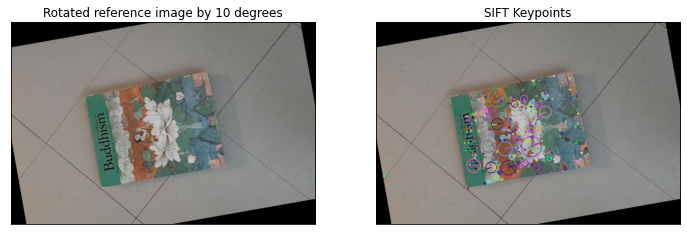

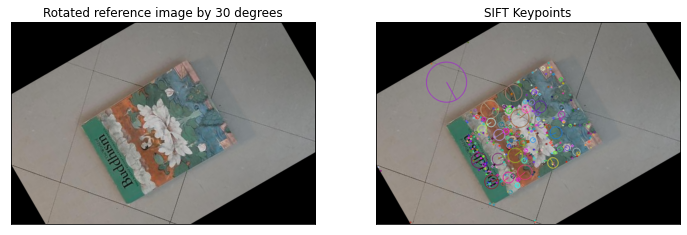

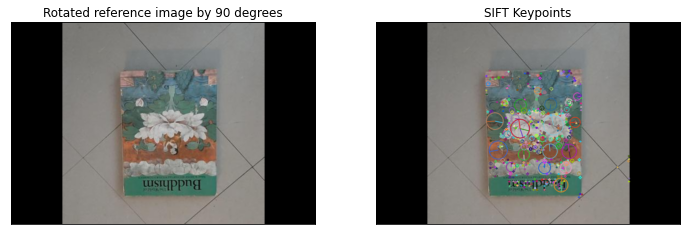

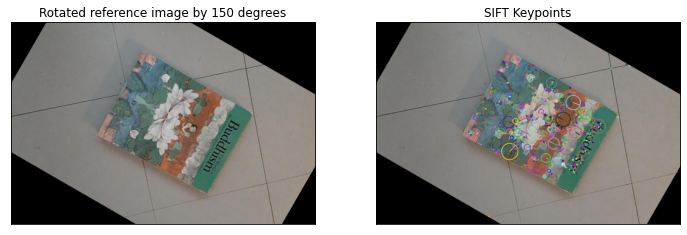

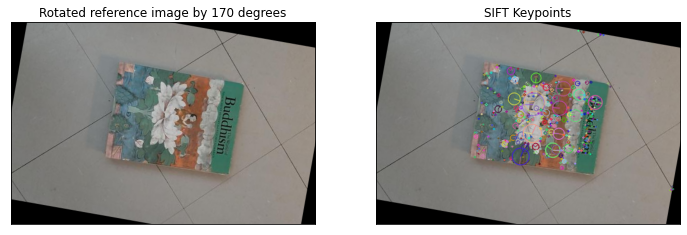

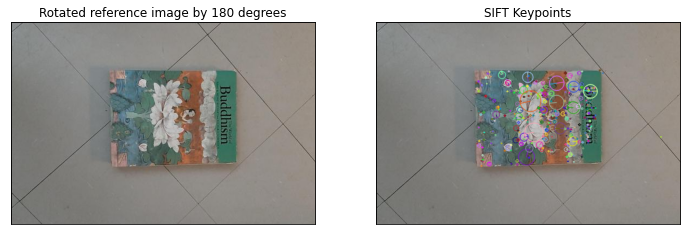

In [76]:
# create copies of the transformed images
book_r10_SIFT = book_r10.copy()
book_r30_SIFT = book_r30.copy()
book_r90_SIFT = book_r90.copy()
book_r150_SIFT = book_r150.copy()
book_r170_SIFT = book_r170.copy()
book_r180_SIFT = book_r180.copy()

# create SIFT objects for each transformed image
book_r10_sift = cv2.xfeatures2d.SIFT_create()
book_r30_sift = cv2.xfeatures2d.SIFT_create()
book_r90_sift = cv2.xfeatures2d.SIFT_create()
book_r150_sift = cv2.xfeatures2d.SIFT_create()
book_r170_sift = cv2.xfeatures2d.SIFT_create()
book_r180_sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT keypoints for each transformed image
book_r10_keypoints, book_r10_descriptors = book_r10_sift.detectAndCompute(book_r10, None)
book_r30_keypoints, book_r30_descriptors = book_r30_sift.detectAndCompute(book_r30, None)
book_r90_keypoints, book_r90_descriptors = book_r90_sift.detectAndCompute(book_r90, None)
book_r150_keypoints, book_r150_descriptors = book_r150_sift.detectAndCompute(book_r150, None)
book_r170_keypoints, book_r170_descriptors = book_r170_sift.detectAndCompute(book_r170, None)
book_r180_keypoints, book_r180_descriptors = book_r180_sift.detectAndCompute(book_r180, None)

# draw the keypoints on each of the copy of the transformed image
cv2.drawKeypoints(book_r10, book_r10_keypoints, book_r10_SIFT, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_r30, book_r30_keypoints, book_r30_SIFT, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_r90, book_r90_keypoints, book_r90_SIFT, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_r150, book_r150_keypoints, book_r150_SIFT, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_r170, book_r170_keypoints, book_r170_SIFT, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_r180, book_r180_keypoints, book_r180_SIFT, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display the results
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_r10)
plt.title("Rotated reference image by 10 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_r10_SIFT)
plt.title("SIFT Keypoints"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_r30)
plt.title("Rotated reference image by 30 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_r30_SIFT)
plt.title("SIFT Keypoints"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_r90)
plt.title("Rotated reference image by 90 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_r90_SIFT)
plt.title("SIFT Keypoints"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_r150)
plt.title("Rotated reference image by 150 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_r150_SIFT)
plt.title("SIFT Keypoints"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_r170)
plt.title("Rotated reference image by 170 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_r170_SIFT)
plt.title("SIFT Keypoints"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(12, 12))
plt.subplot(121), plt.imshow(book_r180)
plt.title("Rotated reference image by 180 degrees"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_r180_SIFT)
plt.title("SIFT Keypoints"), plt.xticks([]), plt.yticks([])

### Match all keypoints of the reference image to the transformed images using a brute-force method

In [77]:
# create Brute Force Matcher object (BFMatcher) for each transformed image
book_r10_bf = cv2.BFMatcher()
book_r30_bf = cv2.BFMatcher()
book_r90_bf = cv2.BFMatcher()
book_r150_bf = cv2.BFMatcher()
book_r170_bf = cv2.BFMatcher()
book_r180_bf = cv2.BFMatcher()

# match descriptors for each transformed image
book_r10_matches = book_r10_bf.match(book_sift_descriptors, book_r10_descriptors)
book_r30_matches = book_r30_bf.match(book_sift_descriptors, book_r30_descriptors)
book_r90_matches = book_r90_bf.match(book_sift_descriptors, book_r90_descriptors)
book_r150_matches = book_r150_bf.match(book_sift_descriptors, book_r150_descriptors)
book_r170_matches = book_r170_bf.match(book_sift_descriptors, book_r170_descriptors)
book_r180_matches = book_r180_bf.match(book_sift_descriptors, book_r180_descriptors)

### Sort matching keypoints according to the matching distance

In [78]:
# sort each transformed image's keypoint matches in the order of their distance
book_r10_matches = sorted(book_r10_matches, key = lambda x:x.distance)
book_r30_matches = sorted(book_r30_matches, key = lambda x:x.distance)
book_r90_matches = sorted(book_r90_matches, key = lambda x:x.distance)
book_r150_matches = sorted(book_r150_matches, key = lambda x:x.distance)
book_r170_matches = sorted(book_r170_matches, key = lambda x:x.distance)
book_r180_matches = sorted(book_r180_matches, key = lambda x:x.distance)

### Display top ten matched keypoints for each pair of reference image and a transformed image

Text(0.5, 1.0, 'Matched keypoints for rotated reference image by 180 degrees')

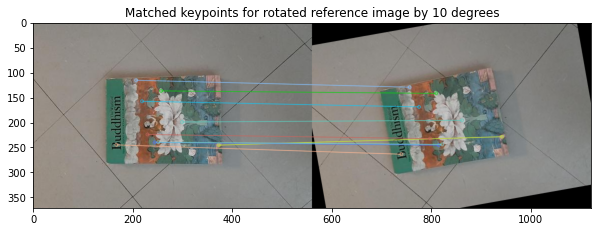

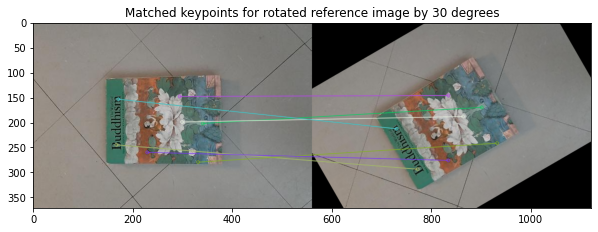

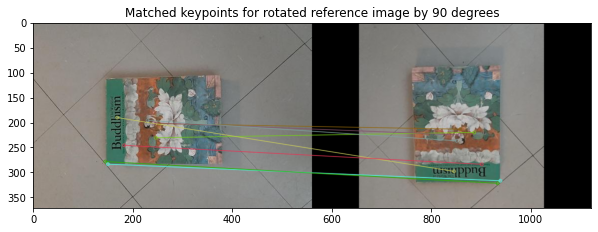

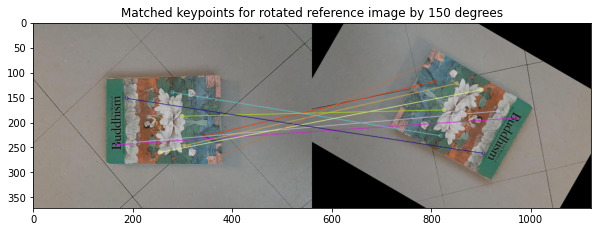

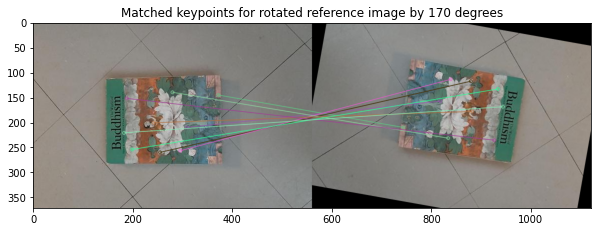

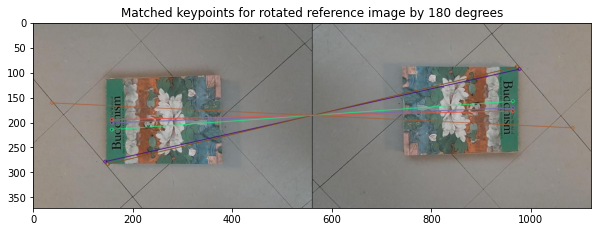

In [79]:
# draw first 10 matches
book_r10_result = cv2.drawMatches(book, book_sift_keypoints, book_r10, book_r10_keypoints, book_r10_matches[:10], None, flags=2)
book_r30_result = cv2.drawMatches(book, book_sift_keypoints, book_r30, book_r30_keypoints, book_r30_matches[:10], None, flags=2)
book_r90_result = cv2.drawMatches(book, book_sift_keypoints, book_r90, book_r90_keypoints, book_r90_matches[:10], None, flags=2)
book_r150_result = cv2.drawMatches(book, book_sift_keypoints, book_r150, book_r150_keypoints, book_r150_matches[:10], None, flags=2)
book_r170_result = cv2.drawMatches(book, book_sift_keypoints, book_r170, book_r170_keypoints, book_r170_matches[:10], None, flags=2)
book_r180_result = cv2.drawMatches(book, book_sift_keypoints, book_r180, book_r180_keypoints, book_r180_matches[:10], None, flags=2)

# display the results
plt.figure(figsize=(10, 10))
plt.imshow(book_r10_result)
plt.title("Matched keypoints for rotated reference image by 10 degrees")
plt.figure(figsize=(10, 10))
plt.imshow(book_r30_result)
plt.title("Matched keypoints for rotated reference image by 30 degrees")
plt.figure(figsize=(10, 10))
plt.imshow(book_r90_result)
plt.title("Matched keypoints for rotated reference image by 90 degrees")
plt.figure(figsize=(10, 10))
plt.imshow(book_r150_result)
plt.title("Matched keypoints for rotated reference image by 150 degrees")
plt.figure(figsize=(10, 10))
plt.imshow(book_r170_result)
plt.title("Matched keypoints for rotated reference image by 170 degrees")
plt.figure(figsize=(10, 10))
plt.imshow(book_r180_result)
plt.title("Matched keypoints for rotated reference image by 180 degrees")

### Plot the matching distance for top 100 matched keypoints

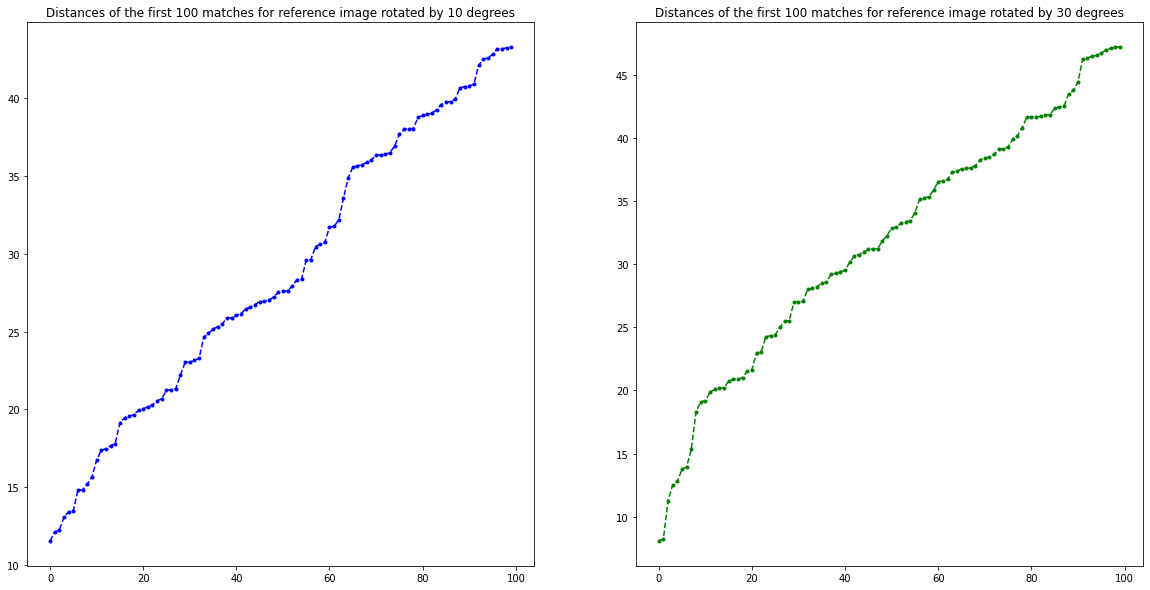

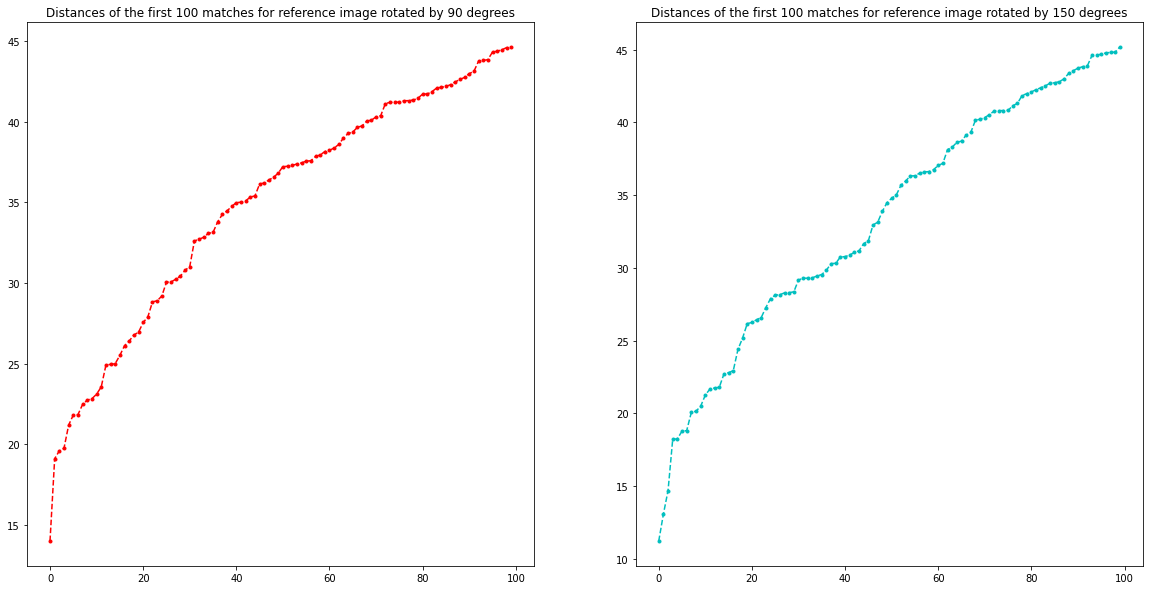

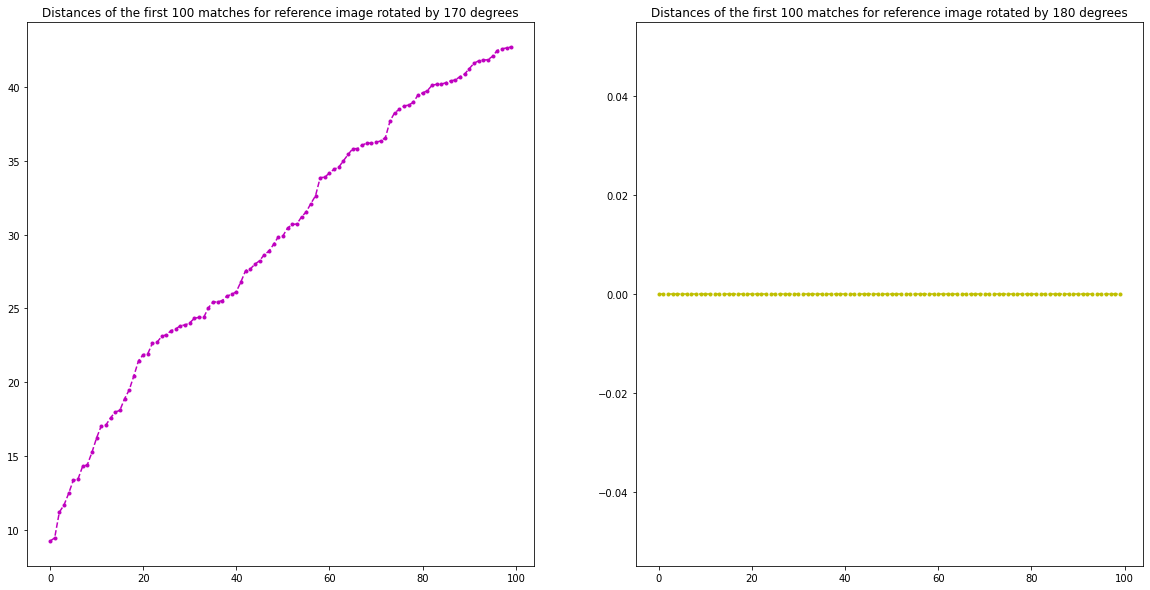

In [80]:
# create data arrays for each of the points
indeces = list(range(100))
book_r10_y = [x.distance for x in book_r10_matches[:100]]
book_r30_y = [x.distance for x in book_r30_matches[:100]]
book_r90_y = [x.distance for x in book_r90_matches[:100]]
book_r150_y = [x.distance for x in book_r150_matches[:100]]
book_r170_y = [x.distance for x in book_r170_matches[:100]]
book_r180_y = [x.distance for x in book_r180_matches[:100]]

# plot the matching distance for top 100 matched keypoints, x-axis = descriptor index, y-axis = distance
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.plot(indeces, book_r10_y, ".--b")
plt.title("Distances of the first 100 matches for reference image rotated by 10 degrees")
plt.subplot(122), plt.plot(indeces, book_r30_y, ".--g")
plt.title("Distances of the first 100 matches for reference image rotated by 30 degrees")
plt.show()
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.plot(indeces, book_r90_y, ".--r")
plt.title("Distances of the first 100 matches for reference image rotated by 90 degrees")
plt.subplot(122), plt.plot(indeces, book_r150_y, ".--c")
plt.title("Distances of the first 100 matches for reference image rotated by 150 degrees")
plt.show()
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.plot(indeces, book_r170_y, ".--m")
plt.title("Distances of the first 100 matches for reference image rotated by 170 degrees")
plt.subplot(122), plt.plot(indeces, book_r180_y, ".--y")
plt.title("Distances of the first 100 matches for reference image rotated by 180 degrees")
plt.show()

### Discuss the trend in the plotted results. What is the effect of increasing the angle of rotation on the matching distance? Reason the cause

As it can be seen from the plots, the first 5 plots that corresponds to rotation angles that are between 0 and 180 degrees are pretty close to each other. It is not possible to see any major differences between these graphs. However, the graph for 180-degree rotation angle, we see that the distance of the first 100 matches are all 0. Since 180-degree is the mirrored version of the reference image, it makes sense that the distance of the matches are 0. And for the rest of the rotations, we can say that there is an upward trend but the match distances do not differ much between difference rotations before 180 degrees.

# 2. Matching using SIFT - Book Reveal

## Find SIFT keypoints in given input images

(Text(0.5, 1.0, 'SIFT Keypoints'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

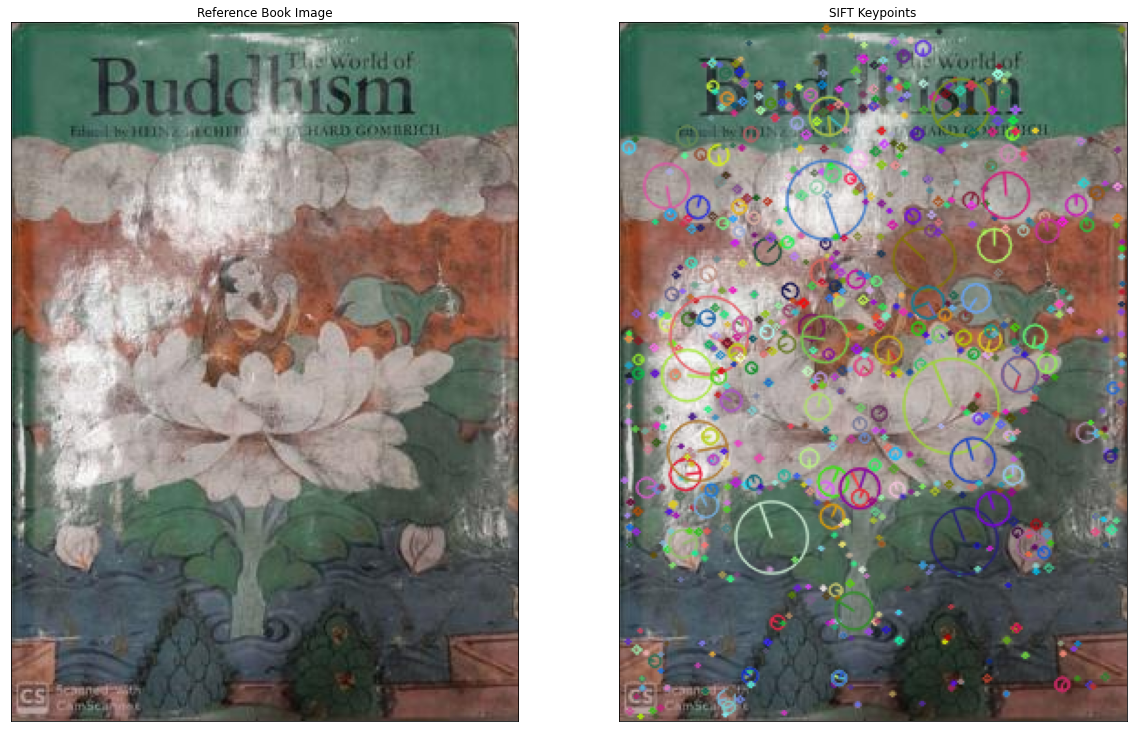

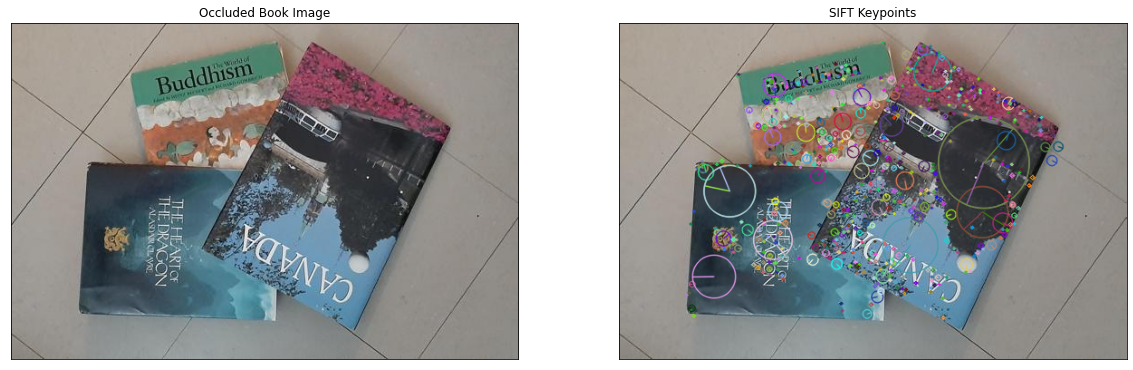

In [81]:
# read each of the given input images
reference_book = cv2.imread('book_crop.jpg')
book_occlusion = cv2.imread('book_occlusion.jpg')

# convert the images from BGR to RGB
reference_book = cv2.cvtColor(reference_book, cv2.COLOR_BGR2RGB)
book_occlusion = cv2.cvtColor(book_occlusion, cv2.COLOR_BGR2RGB)

# create copies of the images
reference_book_sift = reference_book.copy()
book_occlusion_sift = book_occlusion.copy()

# create SIFT objects for each image
reference_book_SIFT = cv2.xfeatures2d.SIFT_create()
book_occlusion_SIFT = cv2.xfeatures2d.SIFT_create()

# find SIFT keypoints and descriptors for each image
reference_book_keypoints, reference_book_descriptors = reference_book_SIFT.detectAndCompute(reference_book, None)
book_occlusion_keypoints, book_occlusion_descriptors = book_occlusion_SIFT.detectAndCompute(book_occlusion, None)

# draw the SIFT keypoints on the copies of the images
cv2.drawKeypoints(reference_book, reference_book_keypoints, reference_book_sift, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(book_occlusion, book_occlusion_keypoints, book_occlusion_sift, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display the results
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(reference_book)
plt.title("Reference Book Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(reference_book_sift)
plt.title("SIFT Keypoints"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(book_occlusion)
plt.title("Occluded Book Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_occlusion_sift)
plt.title("SIFT Keypoints"), plt.xticks([]), plt.yticks([])

## Match keypoints of reference to the keypoints of the accoluded image using brute-force method

In [82]:
# create Brute Force Matcher (BFMatcher) objects for the book occlusion image
reference_book_bf = cv2.BFMatcher()

# match the keypoints of the two images
reference_book_matches = reference_book_bf.match(reference_book_descriptors, book_occlusion_descriptors)

## Sort matching keypoints according to the matching distance

In [83]:
# sort matching keypoints according to the distance
reference_book_matches = sorted(reference_book_matches, key=lambda x:x.distance)

## Display top ten matching keypoints

(Text(0.5, 1.0, 'First 10 matching SIFT keypoints'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

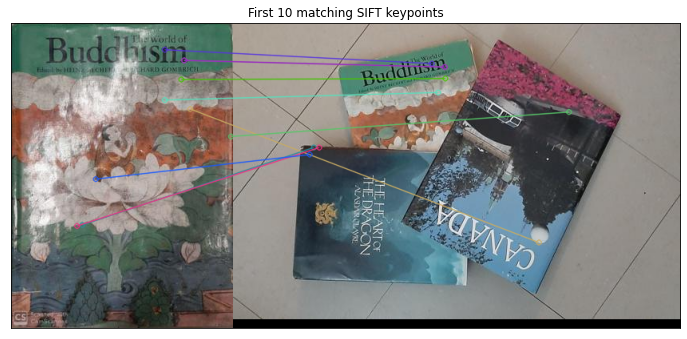

In [84]:
# draw top 10 matching keypoints
book_occlusion_result = cv2.drawMatches(reference_book, reference_book_keypoints, book_occlusion, book_occlusion_keypoints, reference_book_matches[:10], None, flags=2)

# display the result
plt.figure(figsize=(12, 12))
plt.imshow(book_occlusion_result)
plt.title("First 10 matching SIFT keypoints"), plt.xticks([]), plt.yticks([])

## Compute a homography to align the images using RANSAC method and apply the transformation on the reference image

(Text(0.5, 1.0, 'Transformed Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

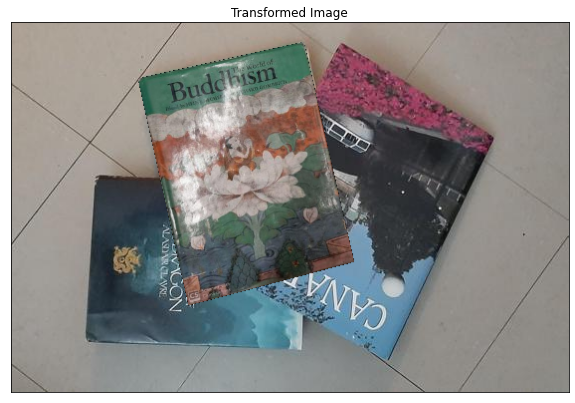

In [85]:
# arrange matching keypoints in two separate lists for homography
good_matches = []
for match in reference_book_matches:
  if match.distance < 150:
    good_matches.append((match.trainIdx, match.queryIdx))
  
reference_book_mp = np.float32([reference_book_keypoints[i].pt for (__, i) in good_matches])
book_occlusion_mp = np.float32([book_occlusion_keypoints[i].pt for (i, __) in good_matches])

# find homography
homography, __ = cv2.findHomography(reference_book_mp, book_occlusion_mp, cv2.RANSAC, 4)

# warp image according to the homography
warped_reference_book = cv2.warpPerspective(reference_book, homography, (book_occlusion.shape[1], book_occlusion.shape[0]))

# create a mask of the of the warped reference book
wrb_gray = cv2.cvtColor(warped_reference_book, cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(wrb_gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# blackout the area of the book on book_occlusion's copy
book_occlusion_transform = book_occlusion.copy()
book_occlusion_transform = cv2.bitwise_and(book_occlusion, book_occlusion, mask=mask_inv)

# take only the region of the book from the warped image
wrb_book = cv2.bitwise_and(warped_reference_book, warped_reference_book, mask=mask)

# put book into the book_occlusion image
end_result = cv2.add(book_occlusion_transform, wrb_book)

# display the result
plt.figure(figsize=(10, 10))
plt.imshow(end_result)
plt.title("Transformed Image"), plt.xticks([]), plt.yticks([])

# 3. Face Detection

## 3.1 Eigenface Representation

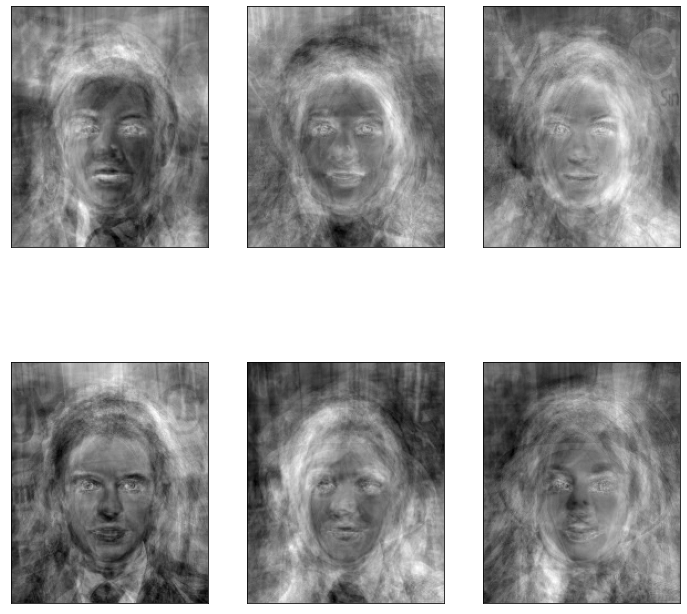

In [86]:
# instantiate training array
# shape returns (row, column)
image_vector = 218 * 178
training_array = []

# loop 100 times to add 100 images from the celebA_subset folder
for i in range(1, 101):
  # construct the file name of the image
  file_name = 'celebA_subset/' + ('0' * (6 - len(str(i)))) + str(i) + '.jpg'
  # read the image as grayscale
  image = cv2.imread(file_name, cv2.COLOR_BGR2RGB)
  # convert the color
  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  # convert image into a vector
  image = image.reshape(image_vector)
  # add image vector to the list
  training_array.append(image)

# define pca algorithm
def pca(training_array):
  # calculate the mean face and convert it into a vector
  mean_matrix = training_array.mean(axis=1)
  mean_matrix = np.row_stack(mean_matrix)
  # subtract mean face from each image vector
  centered_matrix = training_array - mean_matrix
  # calculate covariance matrix of centered matrix
  covariance_matrix = np.cov(centered_matrix.T)
  # eigendecomposition of covarience matrix
  values, vectors = np.linalg.eig(covariance_matrix)
  # sort eigenvectors according to the heighest eigenvalues
  vectors = np.array([vector for value, vector in sorted(zip(values, vectors), reverse=True)])
  # get the top 6 eigenvectors
  vectors = vectors[0:6]
  # get the eigenfaces using projection
  eigenfaces = vectors.dot(training_array.T)
  return eigenfaces

# get PCA of the training array
training_array = np.array(training_array)
training_array = training_array.transpose()
eigenfaces = pca(training_array)

#display the results
plt.figure(figsize=(12, 12))
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(eigenfaces[i].reshape(218, 178), cmap='gray')
  plt.xticks([]), plt.yticks([])

## 3.2 Face Detection

(Text(0.5, 1.0, 'Face Detection with Eigenfaces'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

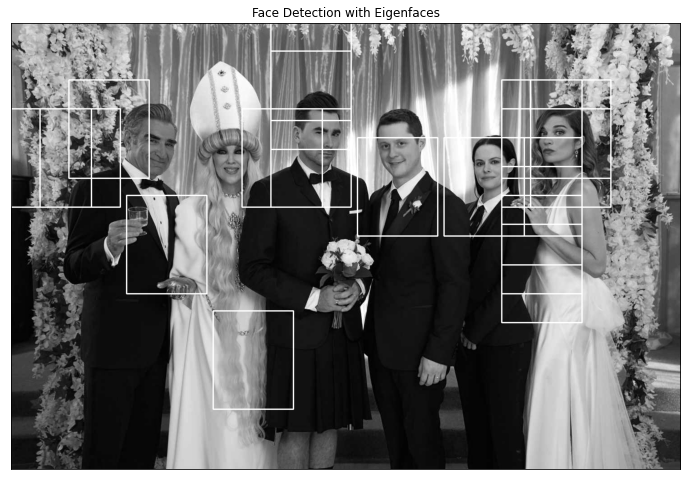

In [91]:
# read the image for face detection
group_photo = cv2.imread("schitt's_creek_group_photo.jpeg", cv2.COLOR_BGR2RGB)
# convert the image into grayscale
group_photo = cv2.cvtColor(group_photo, cv2.COLOR_RGB2GRAY)

# define sliding window generator
def sliding_window(image, step_size, window_size):
  # slide a window across the image
  for height in range(0, image.shape[0], step_size):
    for width in range(0, image.shape[1], step_size):
      # yield the current window
      yield (width, height, image[height:height+window_size[1], width:width+window_size[0]])

# define face detection algorithm
def pca_face_detection(image, eigenfaces, step_size, window_size, threshold=50):
  for width, height, window in sliding_window(image, step_size, window_size):
    if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
      continue
    # image = cv.rectangle(image, (width, height), (width + window_size[0], height + window_size[1]), (255, 0, 0), 2)
    # convert window into a vector
    window = window.reshape(window_size[1] * window_size[0])
    # average face from the training_data
    mean_face = training_array.mean(axis=1)
    # difference between mean face and window
    difference = window - mean_face
    # projection of the normalized window onto the eigenfaces plane
    projections = np.zeros(shape=(window_size[1] * window_size[0],))
    for eigenface in eigenfaces:
      w = eigenface.T.dot(difference)
      projection = w * eigenface
      projections += projection
    distance = np.linalg.norm(difference - projections)
    if distance < threshold:
      image = cv2.rectangle(image, (width, height), (width + window_size[0], height + window_size[1]), (255, 0, 0), 2)

# call the pca_face detection method and display the results
group_photo_fd = group_photo.copy()
pca_face_detection(group_photo_fd, eigenfaces, 64, (178, 218), 2000000000000)
plt.figure(figsize=(12, 12))
plt.imshow(group_photo_fd, cmap='gray')
plt.title("Face Detection with Eigenfaces"), plt.xticks([]), plt.yticks([])

### Viola-Jones Face Detection

(Text(0.5, 1.0, 'Face Detection with Viola Jones Face Detection'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

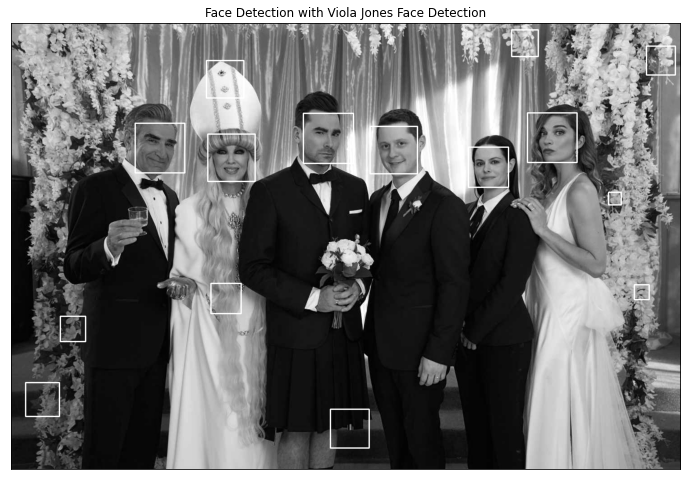

In [92]:
# import the face cascade classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
# detect faces using multiScale method
faces = face_cascade.detectMultiScale(group_photo, 1.1, 2)
# loop over the values in faces and draw rectangles
group_photo_vj = group_photo.copy()
for (x, y, w, h) in faces:
  group_photo_vj = cv.rectangle(group_photo_vj, (x, y), (x + w, y + h), (255, 0, 0), 2)

# display the result
plt.figure(figsize=(12, 12))
plt.imshow(group_photo_vj, cmap='gray')
plt.title("Face Detection with Viola Jones Face Detection"), plt.xticks([]), plt.yticks([])

### Comparison with My Face Detector

My face detector calculates the distances very high, therefore the threshold value must be high as well in order to get some level of face detection. Also, the window size is taken to be equal to the size of the training images. That is why we are seeing bigger rectangles in the output.

Compared the Viola-Jones face detection, the face detection algorith implemented by using eigenfaces produces around 8 false positives (it is hard to count the exact number since there are overlapping rectangles). On the other hand, we see that the Viola-Jones detector also produces false positives, and the number of false positives we see in the output is 9. I can say that, performance-wise, the face detection algorithm implemented using eigenfaces can produce reliable results as well. However, it also missed to detect the faces of two people on the far left. Therefore, Viola-Jones face detection actually performs better compares to eigenface method.

For PCA, we need a specific training set: the training images must be centered and of the same size. Therefore, it will have a hard time detecting other kinds of faces that are not directly looking at the camera, or doing different facial expressions. We can actually see this in effect in the two images above. PCA did not the recognize the the people on the far left who are smiling. However, Viola-Jones is able to detect these faces as well. Viola-Jones detection will work better if the faces are not in the training set and if the people are doing different facial expressions than the training set images.